In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import networkx as nx

In [2]:
G = nx.DiGraph()

In [3]:
df_se = pd.read_csv('./sheep_data/sheep_edges.csv')
df_sa = pd.read_csv('./sheep_data/sheep_age.csv')

In [4]:
G=nx.from_pandas_dataframe(df_se, 'source', 'target', ['weight'])
#G=nx.from_pandas_dataframe(df_se, 'source', 'target')

In [5]:
# Add in node age attr
for k,v in pd.Series(df_sa.age.values, index=df_sa.id).to_dict().items():
    G.node[k]['age'] = v

In [6]:
# Add in node dominated attr
for id in (set(df_se['source'].unique())).union(set(df_se['target'].unique())):
    G.node[id]['dominate'] = df_se[df_se['source'] == id]['weight'].sum()


In [7]:
# Check if edges unique
print(len([tuple(sorted(tuple(x))) for x in df_se[['source','target']].to_records(index=False)]))
print(len(set([tuple(sorted(tuple(x))) for x in df_se[['source','target']].to_records(index=False)])))

250
235


In [8]:
G.nodes().data()

NodeDataView({1: {'age': 8, 'dominate': 5}, 2: {'age': 8, 'dominate': 35}, 3: {'age': 4, 'dominate': 63}, 4: {'age': 7, 'dominate': 25}, 5: {'age': 8, 'dominate': 2}, 6: {'age': 3, 'dominate': nan}, 7: {'age': 5, 'dominate': 43}, 8: {'age': 4, 'dominate': 56}, 9: {'age': 7, 'dominate': 52}, 10: {'age': 9, 'dominate': 3}, 11: {'age': 6, 'dominate': 14}, 12: {'age': 4, 'dominate': 13}, 13: {'age': 9, 'dominate': 30}, 14: {'age': 1, 'dominate': 31}, 15: {'age': 9, 'dominate': 24}, 16: {'age': 9, 'dominate': 16}, 17: {'age': 4, 'dominate': 8}, 18: {'age': 1, 'dominate': 35}, 19: {'age': 1, 'dominate': 16}, 20: {'age': 3, 'dominate': 4}, 21: {'age': 3, 'dominate': 10}, 22: {'age': 1, 'dominate': 65}, 23: {'age': 7, 'dominate': 17}, 24: {'age': 1, 'dominate': 25}, 25: {'age': 9, 'dominate': 25}, 26: {'age': 3, 'dominate': 8}, 27: {'age': 4, 'dominate': 1}, 28: {'age': 9, 'dominate': 32}})

In [9]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 7), (2, 22), (2, 28), (2, 8), (2, 9), (2, 4), (2, 12), (2, 13), (2, 15), (2, 23), (2, 24), (2, 26), (2, 27), (2, 21), (2, 3), (2, 16), (3, 7), (3, 22), (3, 28), (3, 8), (3, 9), (3, 4), (3, 14), (3, 15), (3, 23), (3, 16), (3, 18), (3, 24), (3, 25), (3, 5), (3, 19), (3, 26), (3, 20), (3, 21), (3, 6), (3, 11), (3, 13), (4, 7), (4, 22), (4, 8), (4, 9), (4, 11), (4, 12), (4, 15), (4, 23), (4, 16), (4, 18), (4, 24), (4, 25), (4, 5), (4, 19), (4, 26), (4, 20), (4, 27), (4, 21), (4, 6), (4, 14), (5, 11), (5, 12), (5, 16), (5, 21), (6, 22), (6, 28), (6, 8), (6, 9), (6, 13), (6, 14), (6, 15), (6, 23), (6, 16), (6, 17), (6, 18), (6, 24), (6, 25), (6, 19), (6, 26), (6, 21), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 17), (7, 18), (7, 19), (7, 20), (7, 21), (8, 22), (8, 9), (8, 13), (8, 15), (8, 23), (8, 16), (8, 17), (8, 18), (8, 24), (8, 19), (8, 26), (8, 21), (9, 22), (9, 28), (9, 11), (9, 13), (9, 14),

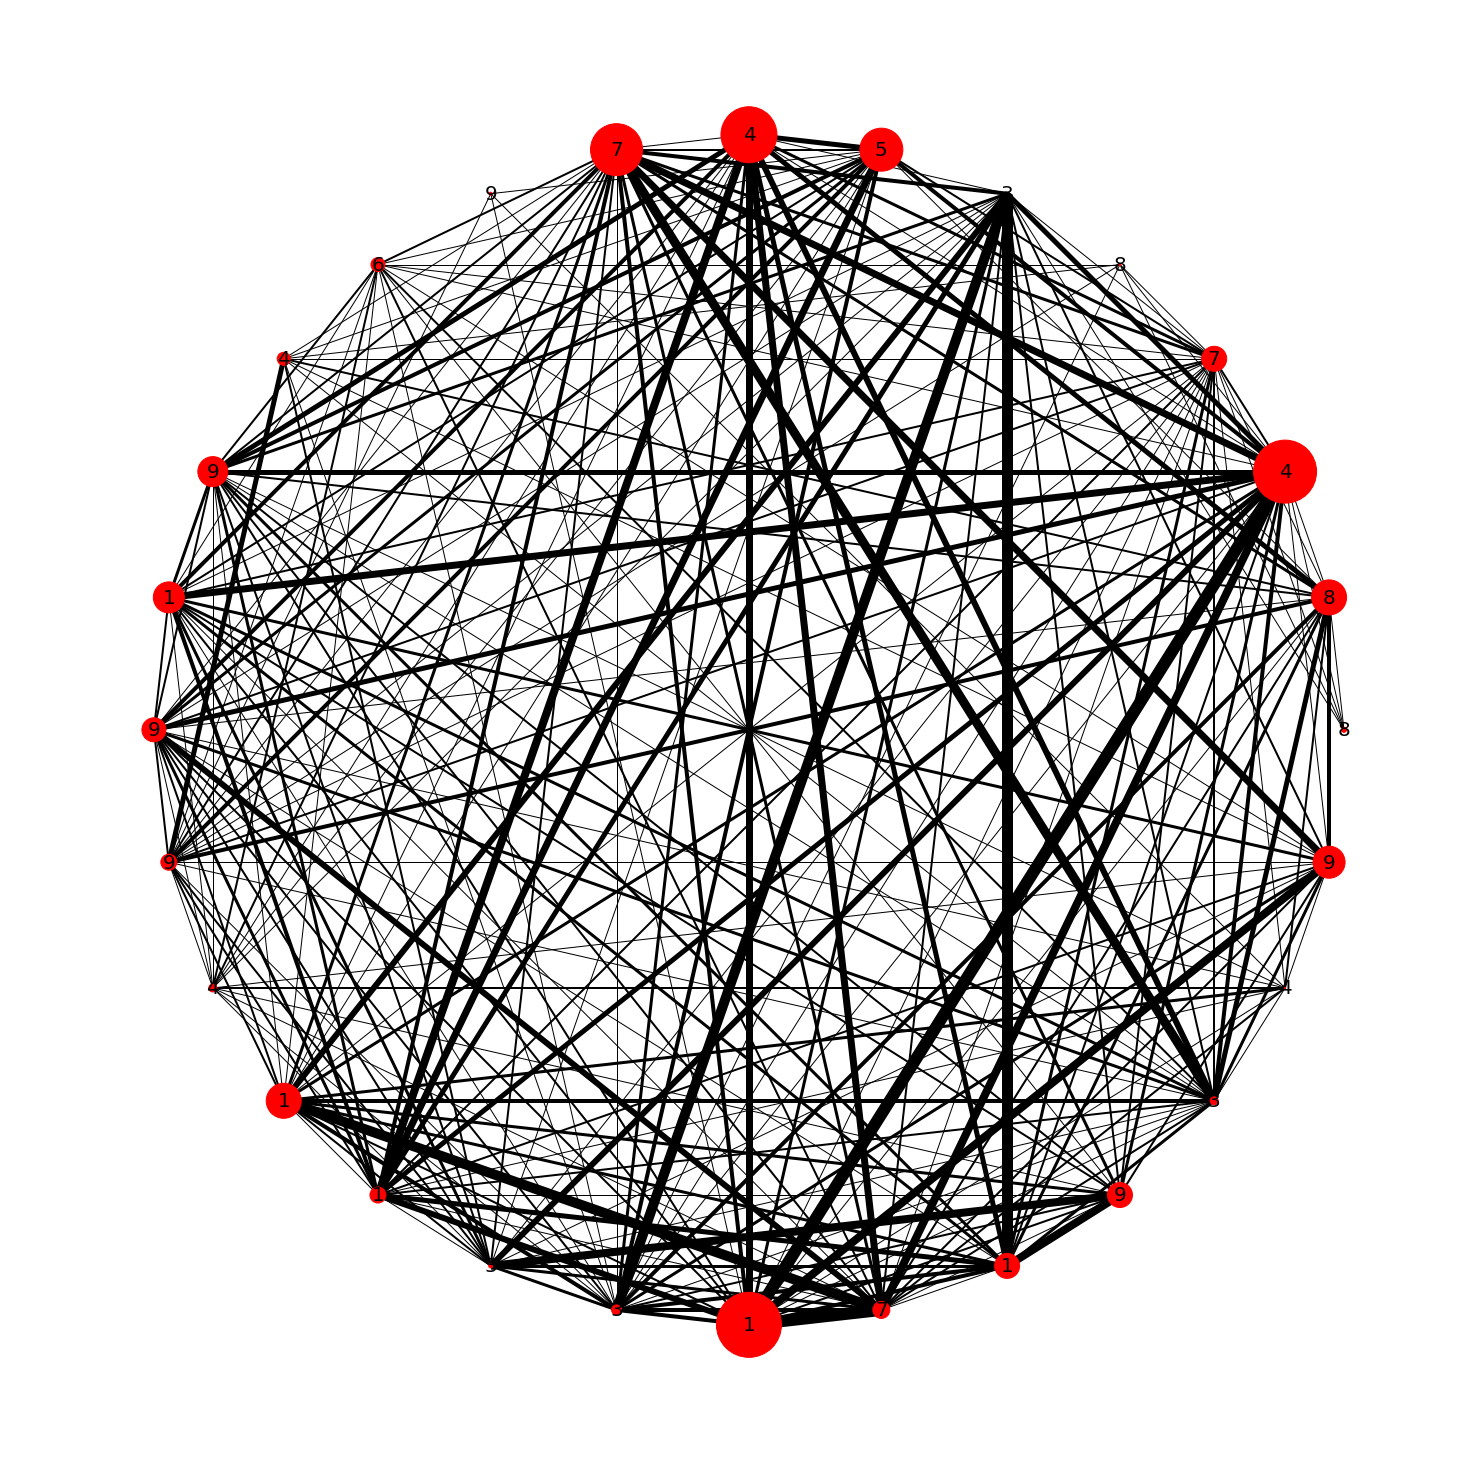

In [29]:
#ps=nx.spring_layout(G,scale=3)
ps=nx.circular_layout(G,scale=3)
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(20,20))
#nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=dict(nx.degree(G, weight='weight')).keys(), node_size=[v * v for v in dict(nx.degree(G, weight='weight')).values()])
nx.draw(G, pos=ps, edgelist=edges, width=weights, nodelist=nx.get_node_attributes(G,'dominate').keys(), node_size=[v * v for v in nx.get_node_attributes(G,'dominate').values()])
#nx.draw(G, pos=ps, nodelist=nx.get_node_attributes(G,'dominate').keys(), node_size=[v * v for v in nx.get_node_attributes(G,'dominate').values()])
nx.draw_networkx_labels(G,pos=ps,labels=nx.get_node_attributes(G,'age'), font_size=20,font_family='sans-serif')
#edge_labels=dict([((u,v,),d['weight']) for u,v,d in G.edges(data=True)])
#nx.draw_networkx_edge_labels(G, ps, edge_labels=edge_labels, label_pos=0.3, font_size=7)
plt.show()

In [25]:

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx

#G=nx.karate_club_graph()

plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),\
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)

TypeError: keys must be a string

In [ ]:
nx.karate_club_graph().edges()

In [35]:
df_se[df_se['source'] == 9]

,source,target,weight
66,9,28,7
67,9,11,2
68,9,4,3
69,9,13,2
70,9,14,4
71,9,15,1
72,9,23,3
73,9,16,2
74,9,17,2
75,9,18,3


In [34]:
df_sa

,id,age
0,1,8
1,2,8
2,3,4
3,4,7
4,5,8
5,6,3
6,7,5
7,8,4
8,9,7
9,10,9
